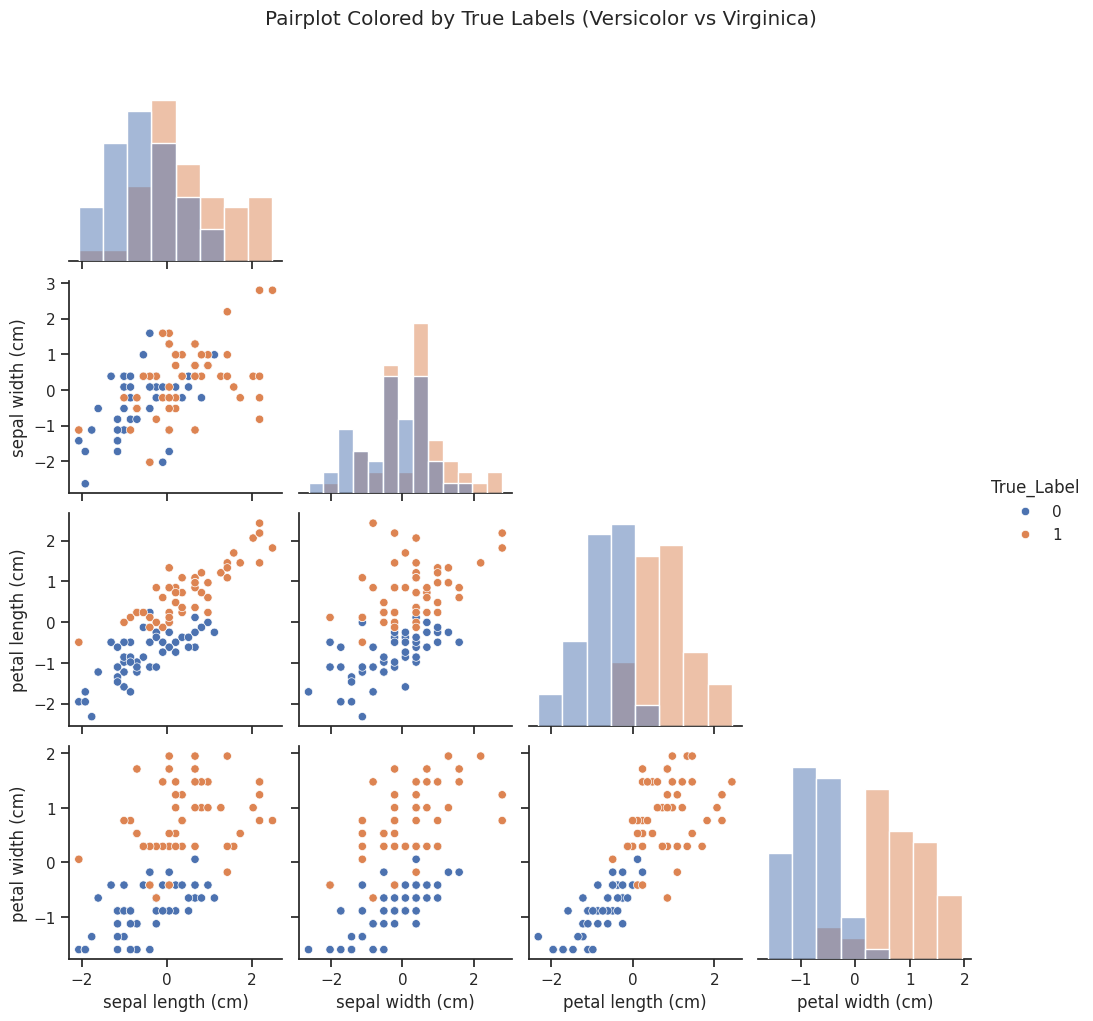

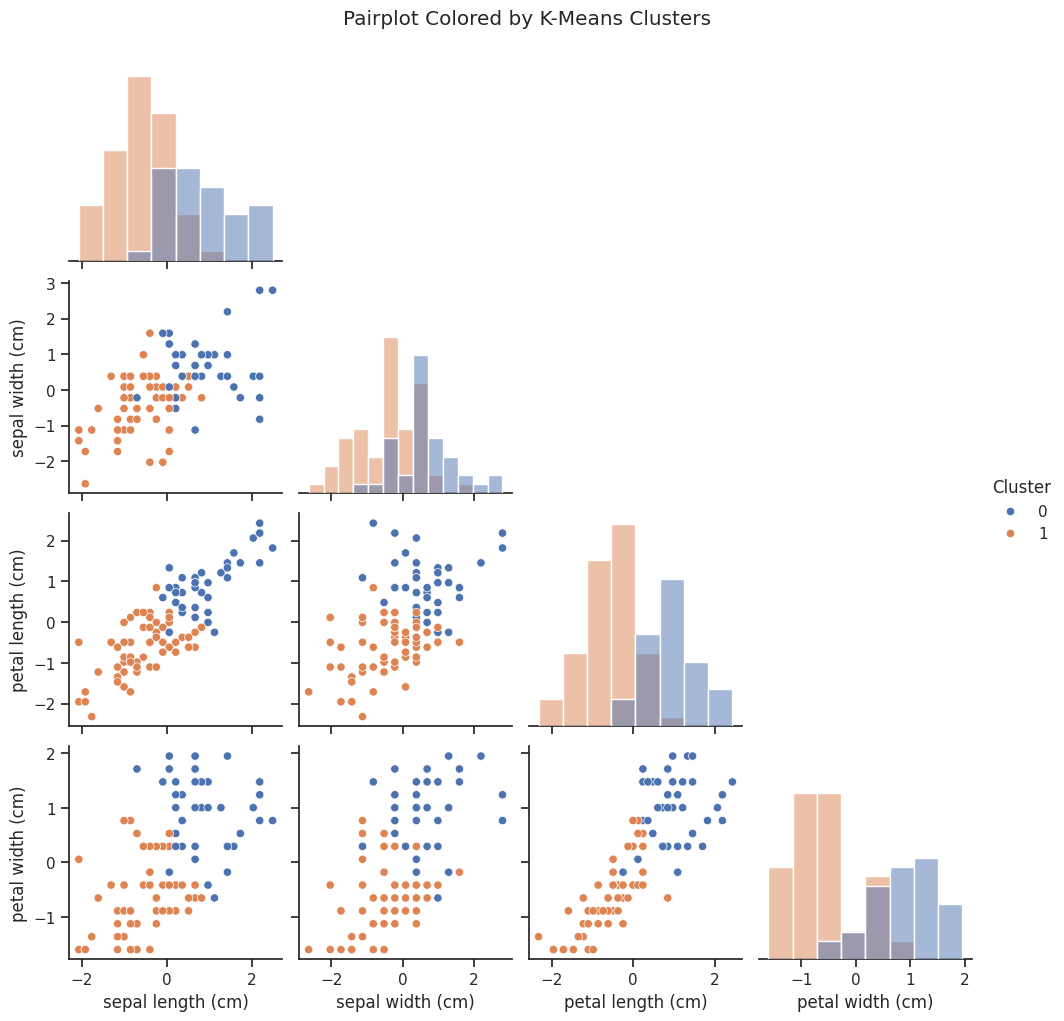

In [ ]:
from sklearn.datasets import load_iris
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load original Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Convert to binary classification by keeping classes 1 and 2 (versicolor and virginica)
mask = y != 0  # Remove Setosa
X_binary = X[mask]
y_binary = y[mask] - 1  # Relabel: 1 -> 0 (versicolor), 2 -> 1 (virginica)

# Standardize features for better clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_binary)

# Apply KMeans with 2 clusters
kmeans_binary = KMeans(n_clusters=2, random_state=0)
y_pred_binary = kmeans_binary.fit_predict(X_scaled)

# Create DataFrame for plotting
df = pd.DataFrame(X_scaled, columns=iris.feature_names)
df['True_Label'] = y_binary.astype(int)
df['Cluster'] = y_pred_binary.astype(int)

# Pairplot colored by true labels
sns.set(style="ticks")
pairplot_true = sns.pairplot(df, vars=iris.feature_names, hue='True_Label', diag_kind="hist", corner=True)
pairplot_true.fig.suptitle("Pairplot Colored by True Labels (Versicolor vs Virginica)", y=1.02)
plt.show()

# Pairplot colored by predicted clusters
pairplot_cluster = sns.pairplot(df, vars=iris.feature_names, hue='Cluster', diag_kind="hist", corner=True)
pairplot_cluster.fig.suptitle("Pairplot Colored by K-Means Clusters", y=1.02)
plt.show()


Accuracy after optimal label mapping: 0.8200


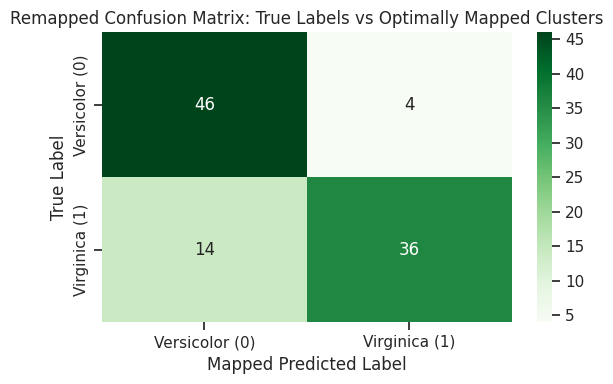

In [ ]:

from scipy.optimize import linear_sum_assignment
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, confusion_matrix
import seaborn as sns
# Compute confusion matrix
cm = confusion_matrix(y_binary, y_pred_binary)

# Use Hungarian algorithm to find optimal 1-to-1 mapping
row_ind, col_ind = linear_sum_assignment(-cm)

# Remap cluster labels based on optimal mapping
label_map = dict(zip(col_ind, row_ind))
y_pred_remapped = np.array([label_map[label] for label in y_pred_binary])

# Compute accuracy after label remapping
remapped_cm = confusion_matrix(y_binary, y_pred_remapped)
accuracy = remapped_cm.trace() / remapped_cm.sum()

# Display accuracy and remapped confusion matrix
print(f"Accuracy after optimal label mapping: {accuracy:.4f}")

# Plot the remapped confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(remapped_cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Versicolor (0)', 'Virginica (1)'],
            yticklabels=['Versicolor (0)', 'Virginica (1)'])
plt.title("Remapped Confusion Matrix: True Labels vs Optimally Mapped Clusters")
plt.xlabel("Mapped Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

In [ ]:
# ARI between true labels and original (unmapped) predicted clusters
ari_original = adjusted_rand_score(y_binary, y_pred_binary)

# ARI between true labels and optimally mapped cluster labels
ari_remapped = adjusted_rand_score(y_binary, y_pred_remapped)

print(f"ARI before mapping: {ari_original:.4f}")
print(f"ARI after mapping:  {ari_remapped:.4f}")

ARI before mapping: 0.4038
ARI after mapping:  0.4038


##K Means Clustering model Evaluation:

**Accuracy:**
The high accuracy comes after remapping the predicted cluster labels to best match the true labels by:

Majority Voting, or

Hungarian Algorithm (optimal label alignment).

This gives a good intuitive measure, but it can be misleading, especially when:

k > #true classes: multiple clusters may map to the same true label.

Class imbalance or noise distorts true mapping.

**ARI = Adjusted Rand Index is:**

ARI (Adjusted Rand Index) measures the similarity between the true labels and the clustering labels, adjusted for chance.

Higher ARI ⇒ clustering aligns well with true labels.

Lower ARI ⇒ poor clustering or random-like assignment.

Label-independent: Doesn’t care if cluster 0 means Versicolor or Virginica.

Evaluates pairwise agreement: “Are pairs of points in same/different clusters in both true and predicted?”

Adjusted for chance, so even random clustering scores near 0.

Thus, ARI is stricter and more objective — it penalizes split/misgrouped pairs, not just label mismatches.

 ## Example code with number of clusters are greater than the number of classes based on the ground truth labels are same. Iris dataset is used with k=5 clusters and actual ground truth labels = 3

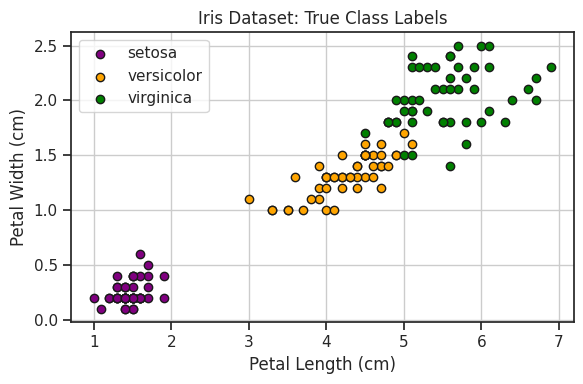

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
iris = load_iris()
X = iris.data[:, [2, 3]]  # Use petal length and width for clarity
y = iris.target
colors = ['purple', 'orange', 'green']
labels = iris.target_names

# Plot
plt.figure(figsize=(6, 4))
for class_idx in range(3):
    plt.scatter(X[y == class_idx, 0], X[y == class_idx, 1],
                color=colors[class_idx], label=labels[class_idx], edgecolor='k')

plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.title("Iris Dataset: True Class Labels")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

This will visually show how well-separated the Setosa class is, and how Versicolor and Virginica overlap — a common reason why clustering algorithms like K-Means may struggle without supervision.

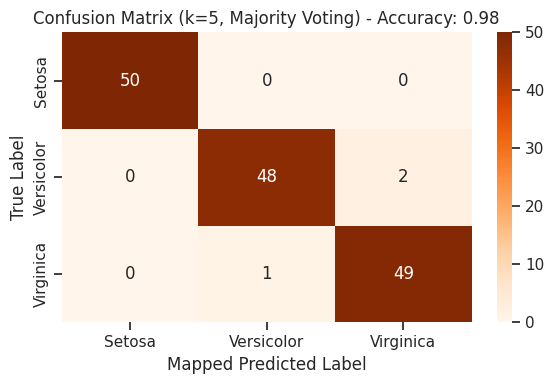

In [ ]:
from collections import Counter


# Load full Iris dataset with 3 true classes
iris = load_iris()
X = iris.data
y_true = iris.target  # values: 0 (Setosa), 1 (Versicolor), 2 (Virginica)

# Apply KMeans with k = 5 (overclustering: more clusters than classes)
kmeans_over = KMeans(n_clusters=5, random_state=42)
y_pred_k5 = kmeans_over.fit_predict(X)



# Apply Majority Voting Mapping
def majority_vote_mapping(y_true, y_pred):
    labels = np.zeros_like(y_pred)
    for cluster in np.unique(y_pred):
        mask = y_pred == cluster
        if np.any(mask):
            most_common = Counter(y_true[mask]).most_common(1)[0][0]
            labels[mask] = most_common
    return labels

y_pred_mapped = majority_vote_mapping(y_true, y_pred_k5)

# Compute confusion matrix after majority voting mapping
cm_k5 = confusion_matrix(y_true, y_pred_mapped)
accuracy_k5 = cm_k5.trace() / cm_k5.sum()

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_k5, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Setosa', 'Versicolor', 'Virginica'],
            yticklabels=['Setosa', 'Versicolor', 'Virginica'])
plt.title(f"Confusion Matrix (k=5, Majority Voting) - Accuracy: {accuracy_k5:.2f}")
plt.xlabel("Mapped Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

Accuracy: 0.98

Very few misclassifications:

Just 2 Versicolor → Virginica

1 Virginica → Versicolor

In [ ]:
# ARI between true labels and original (unmapped) predicted clusters
ari_original = adjusted_rand_score(y_true, y_pred_k5)

# ARI between true labels and optimally mapped cluster labels
ari_remapped = adjusted_rand_score(y_true, y_pred_mapped)

print(f"ARI before mapping: {ari_original:.4f}")
print(f"ARI after mapping:  {ari_remapped:.4f}")

ARI before mapping: 0.6927
ARI after mapping:  0.9410
